In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [116]:
keys_ordered = ["ATSP/br17.atsp", "ATSP/ftv33.atsp", "ATSP/ftv38.atsp", "ATSP/ry48p.atsp", "ATSP/ft53.atsp", "ATSP/ftv55.atsp", "ATSP/ft70.atsp", "ATSP/kro124p.atsp"]
f = open("../quality_similarity.txt", "r")
text = f.read()

optimas = {}
optimas["ATSP/ft53.atsp"] = 1324
optimas["ATSP/ftv38.atsp"] = 1633

best_solution_53 = [9, 8, 17, 11, 2, 1, 0, 34, 32, 33, 31, 30, 38, 4, 7, 6, 5, 51, 48, 49, 52, 50, 29, 28, 25, 27, 26, 3, 41, 47, 42, 46, 43, 45, 44, 23, 20, 22, 18, 16, 24, 19, 15, 37, 35, 40, 21, 39, 36, 10, 12, 14, 13]
best_solution_38 = [37, 9, 8, 10, 12, 13, 36, 21, 22, 20, 11, 14, 17, 18, 19, 0, 16, 29, 1, 35, 33, 30, 26, 28, 27, 23, 24, 25, 31, 32, 34, 38, 2, 3, 15, 5, 7, 6, 4]
dict_53 = {}
for index, item in enumerate(best_solution_53):
    dict_53[str(item)] = best_solution_53[(index + 1)% len(best_solution_53)]
    
dict_38 = {}
for index, item in enumerate(best_solution_38):
    dict_38[str(item)] = best_solution_38[(index + 1)% len(best_solution_38)]

In [117]:
def cycle_similarity(c1, c2_dict):
    same_edge_count = 0
    for index, node in enumerate(c1):
        if c2_dict[str(node)] == c1[(index+1) % len(c1)]: 
            same_edge_count += 1

    return same_edge_count / len(c1)

In [118]:
cycle_similarity(best_solution_53, dict_53)

1.0

In [119]:
print(best_solution_53)
print(dict_53)

[9, 8, 17, 11, 2, 1, 0, 34, 32, 33, 31, 30, 38, 4, 7, 6, 5, 51, 48, 49, 52, 50, 29, 28, 25, 27, 26, 3, 41, 47, 42, 46, 43, 45, 44, 23, 20, 22, 18, 16, 24, 19, 15, 37, 35, 40, 21, 39, 36, 10, 12, 14, 13]
{'9': 8, '8': 17, '17': 11, '11': 2, '2': 1, '1': 0, '0': 34, '34': 32, '32': 33, '33': 31, '31': 30, '30': 38, '38': 4, '4': 7, '7': 6, '6': 5, '5': 51, '51': 48, '48': 49, '49': 52, '52': 50, '50': 29, '29': 28, '28': 25, '25': 27, '27': 26, '26': 3, '3': 41, '41': 47, '47': 42, '42': 46, '46': 43, '43': 45, '45': 44, '44': 23, '23': 20, '20': 22, '22': 18, '18': 16, '16': 24, '24': 19, '19': 15, '15': 37, '37': 35, '35': 40, '40': 21, '21': 39, '39': 36, '36': 10, '10': 12, '12': 14, '14': 13, '13': 9}


In [120]:
cases = {}
casename = ""
algorithm = ""
for line in text.split("\n"):
    if line[:7] == "Problem":
        casename = line[8:-1]
        cases[casename] = {}
    if len(line.split()) > 1 and line.split()[1] == "runs":
        algorithm = line.split()[0]
        cases[casename][algorithm] = {"best": [], "cycle": [], "similarity": []}
    
    elements = line.split()

    if len(elements) > 6:
        cases[casename][algorithm]["best"].append(int(elements[0]))
        cases[casename][algorithm]["cycle"].append([int(i) for i in elements[1:]])
        if "53" in casename:
            cases[casename][algorithm]["similarity"].append(cycle_similarity(cases[casename][algorithm]["cycle"][-1], dict_53))
        else:
            cases[casename][algorithm]["similarity"].append(cycle_similarity(cases[casename][algorithm]["cycle"][-1], dict_38))


cases = {i: cases[i] for i in keys_ordered if i in cases.keys()}

In [121]:
print(cases)

{'ATSP/ftv38.atsp': {'R': {'best': [5676, 5567, 5258, 4631, 5599, 5544, 4678, 5098, 5364, 5305, 5254, 4842, 4769, 4923, 5106, 5360, 5124, 4681, 4878, 4924, 5193, 4912, 5230, 5042, 4995, 4866, 5225, 4855, 5080, 5294, 5173, 5640, 5452, 5157, 5128, 5194, 5231, 5094, 5219, 5026, 5240, 5129, 5281, 5457, 4965, 5047, 5447, 4894, 5006, 4833], 'cycle': [[32, 0, 3, 1, 13, 26, 14, 11, 25, 8, 29, 23, 28, 18, 24, 17, 27, 33, 35, 37, 15, 19, 21, 36, 30, 12, 38, 5, 31, 16, 6, 9, 4, 22, 2, 10, 34, 20, 7], [27, 10, 34, 2, 6, 12, 17, 23, 14, 31, 18, 24, 15, 26, 13, 9, 19, 8, 32, 30, 5, 35, 29, 38, 22, 3, 1, 25, 20, 28, 16, 7, 4, 0, 21, 37, 36, 33, 11], [32, 1, 27, 7, 35, 2, 9, 34, 13, 25, 21, 37, 29, 33, 18, 10, 23, 11, 38, 26, 19, 17, 20, 6, 8, 30, 24, 12, 15, 5, 14, 22, 16, 4, 36, 0, 31, 28, 3], [25, 35, 27, 20, 5, 4, 15, 9, 36, 10, 8, 6, 7, 37, 3, 31, 16, 17, 30, 14, 24, 34, 29, 1, 13, 19, 2, 23, 28, 21, 12, 18, 26, 11, 38, 0, 22, 33, 32], [4, 1, 37, 15, 21, 5, 2, 7, 3, 22, 32, 9, 11, 26, 38, 16, 31,

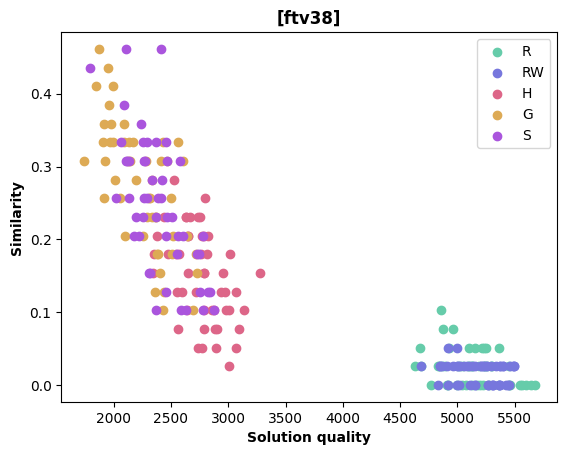

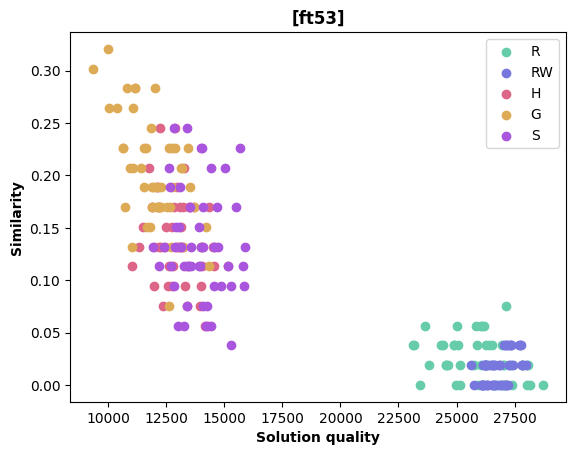

In [122]:
ticks = [i[5:-5] for i in list(cases.keys())]

colors = ["#66ccaa", "#7777dd", "#dd6688", "#ddaa55", "#aa55dd"]
for instance in range(2):
    for index, algorithm in enumerate(["R", "RW", "H", "G", "S"]):

        key = list(cases.keys())[instance]
        plt.scatter(cases[key][algorithm]["best"], cases[key][algorithm]["similarity"], color=colors[index], label=algorithm)

    plt.title("[" + ticks[instance] + "]", fontweight='bold')
    plt.xlabel('Solution quality', fontweight='bold')
    plt.ylabel("Similarity", fontweight='bold')
    
    plt.legend()
    plt.savefig('quality_similarity' + str(instance) +'.pdf')
    plt.show()